## Model 3: Ridge Model

Ridge Regression is a type of linear regression that includes a regularization term in the cost function to prevent overfitting, especially when there are many correlated features, as is the case with our dataset. This model addresses multicollinearity by adding a penalty to the size of the coefficients, ensuring that no single feature exerts too much influence, which is particularly useful for managing correlated predictors.

### Model Building and Evaluation: 
The code loads the dataset, preprocesses it using a column transformer to handle categorical variables, and builds three different Ridge Regression models. Each model uses a different set of features for predictions, and their performances are evaluated using Mean Absolute Error (MAE).
**Single Feature (avg_price):** Predicting prices based on a single feature: `avg_price`.

**Two Features (amountMin and amountMax):** Using `prices.amountMin` and `prices.amountMax`.

**All Three Features:** Using all three features.

In [5]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load cleaned data
df = pd.read_csv("shoes.csv")

# Ensure column names are consistent
df.rename(columns={
    'prices.condition': 'prices_condition',
    'prices.currency': 'prices_currency',
    'prices.isSale': 'prices_isSale'
}, inplace=True)

# Define categorical columns
categorical_cols = ['brand', 'name', 'categories', 'colors', 'prices_condition', 
                    'prices_currency', 'prices_isSale', 'merchant_source', 'shoe_category']

# Model 1: Using avg_price alone
X_avg = df[categorical_cols]
y_avg = df['avg_price']

# Model 2: Using prices.amountMin and prices.amountMax
numerical_cols_min_max = ['prices.amountMin', 'prices.amountMax']
X_min_max = df[categorical_cols + numerical_cols_min_max]
y_min_max = df['avg_price']

# Model 3: Using all three features
numerical_cols_all = ['prices.amountMin', 'prices.amountMax', 'avg_price']
X_all = df[categorical_cols + numerical_cols_all]
y_all = df['avg_price']

# Function to build and evaluate a model
def build_and_evaluate_model(X, y, categorical_cols):
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ], remainder='passthrough')

    model = Ridge()

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Returning the test sets and predictions
    return mae, y_test, y_pred

# Evaluate each model
mae_avg, y_test_avg, y_pred_avg = build_and_evaluate_model(X_avg, y_avg, categorical_cols)
mae_min_max, y_test_min_max, y_pred_min_max = build_and_evaluate_model(X_min_max, y_min_max, categorical_cols)
mae_all, y_test_all, y_pred_all = build_and_evaluate_model(X_all, y_all, categorical_cols)

print(f'MAE using avg_price alone: {mae_avg}')
print(f'MAE using prices.amountMin and prices.amountMax: {mae_min_max}')
print(f'MAE using all three features: {mae_all}')


MAE using avg_price alone: 28.96101787210722
MAE using prices.amountMin and prices.amountMax: 0.015897338265348157
MAE using all three features: 0.010598572720798222


### Interpretation of MAE Results:
**MAE using `avg_price` alone (28.9610):** This high error indicates that using only the average price for predictions is not very accurate.

**MAE using `prices.amountMin` and `prices.amountMax` (0.0159):** Utilizing both the minimum and maximum prices significantly improves the prediction accuracy.

**MAE using all three features (0.0106):** Incorporating avg_price along with prices.amountMin and prices.amountMax yields the most accurate predictions.



### Plotting Actual vs predicted prices for all three models

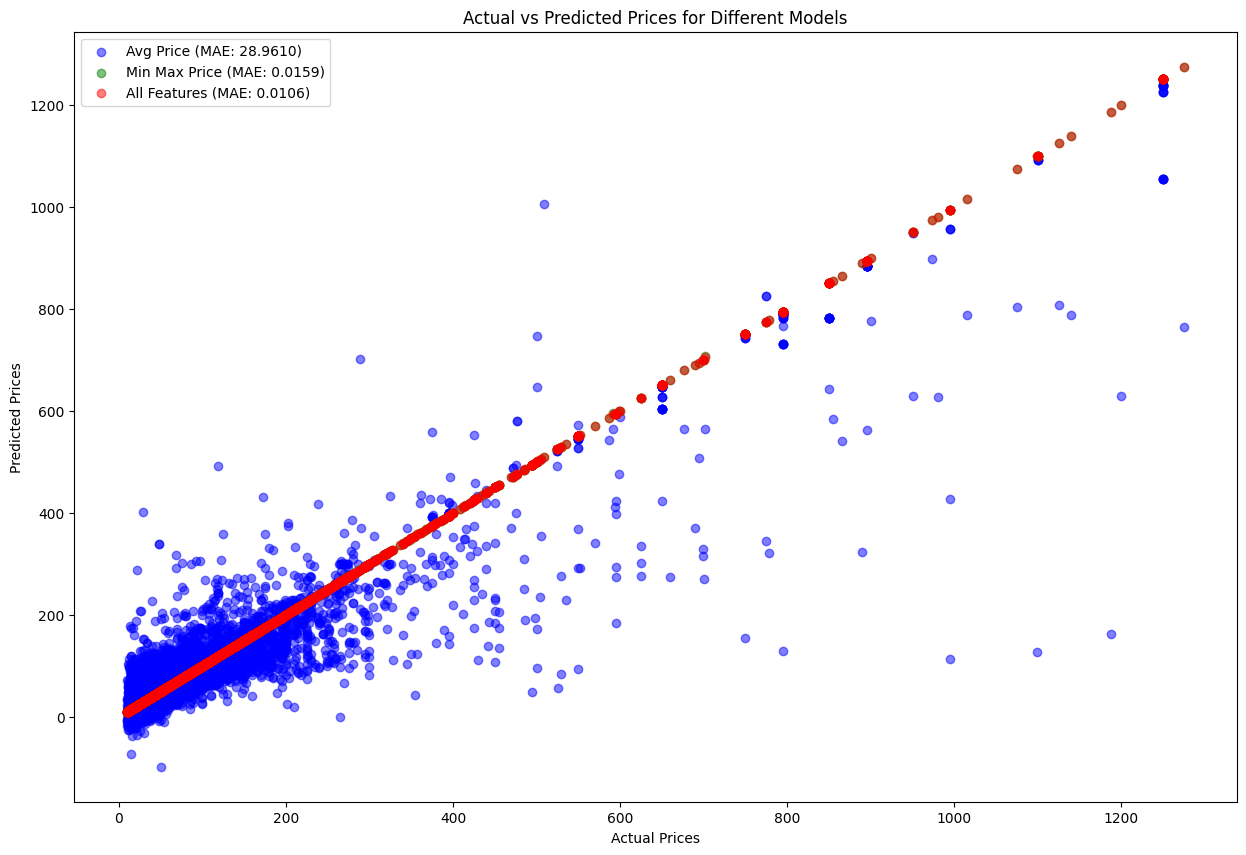

In [6]:
import matplotlib.pyplot as plt
# Plotting Actual vs Predicted values for all models
plt.figure(figsize=(15, 10))

# Actual vs Predicted for avg_price alone
plt.scatter(y_test_avg, y_pred_avg, alpha=0.5, label='Avg Price (MAE: {:.4f})'.format(mae_avg), color='blue')

# Actual vs Predicted for min and max prices
plt.scatter(y_test_min_max, y_pred_min_max, alpha=0.5, label='Min Max Price (MAE: {:.4f})'.format(mae_min_max), color='green')

# Actual vs Predicted for all three features
plt.scatter(y_test_all, y_pred_all, alpha=0.5, label='All Features (MAE: {:.4f})'.format(mae_all), color='red')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices for Different Models')
plt.legend()
plt.show()

Based on the evaluation, the Ridge Regression model using all three features (avg_price, prices.amountMin, and prices.amountMax) is recommended for price modeling. It effectively handles multicollinearity and provides the most precise predictions with the lowest MAE. Additionally, the model is computationally efficient, making it suitable for real-time applications.

Ridge Regression is an effective modeling technique for our dataset due to the number of features and the presence of multicollinearity. It strikes a balance between fitting the data well and maintaining model simplicity, enhancing the model's ability to generalize to new data.


#### Table Preview of Actual Vs Predicted Prices

In [7]:
# Create DataFrame to show actual vs predicted values for top 10 values for each model
results_avg = pd.DataFrame({'Actual': y_test_avg, 'Predicted': y_pred_avg}).head(10)
results_min_max = pd.DataFrame({'Actual': y_test_min_max, 'Predicted': y_pred_min_max}).head(10)
results_all = pd.DataFrame({'Actual': y_test_all, 'Predicted': y_pred_all}).head(10)

# Combine results into a single DataFrame with MultiIndex
combined_results = pd.concat([results_avg, results_min_max, results_all], 
                             keys=['Avg Price', 'Min Max Price', 'All Features'], 
                             names=['Model', 'Index'])

# Display the combined table
print(combined_results)

                     Actual   Predicted
Model         Index                    
Avg Price     8592   126.00  145.054367
              3242    89.21  167.454079
              6988    55.00   55.650893
              29219   44.15   70.228138
              6133   119.00   74.609730
              29110  107.15  104.116917
              13904   43.99   30.941384
              6400    22.46   16.878221
              32266   22.99   17.284927
              7602    54.95   58.085840
Min Max Price 8592   126.00  125.991420
              3242    89.21   89.203681
              6988    55.00   54.995297
              29219   44.15   44.146461
              6133   119.00  118.991566
              29110  107.15  107.142017
              13904   43.99   43.985472
              6400    22.46   22.457113
              32266   22.99   22.986964
              7602    54.95   54.945635
All Features  8592   126.00  125.994283
              3242    89.21   89.205786
              6988    55.00   54.996860
